In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error

In [ ]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Vaishnavi\OneDrive\Documents\OneDrive\Desktop\Sales Forecasting with Time Series Analysis\data\gold_prices.csv')

In [ ]:
# Print column names for checking the exact column

print("Columns in dataset:", data.columns)


Columns in dataset: Index(['Date', 'Price'], dtype='object')


In [ ]:
# Count  no. of columns
print("Total Number of Columns:", len(data.columns))

Total Number of Columns: 2


In [ ]:
# Assume the column with gold prices is "Price"

data['Date'] = pd.to_datetime(data['Date'])  # Ensure the 'Date' column is in date and time
data.set_index('Date', inplace=True)


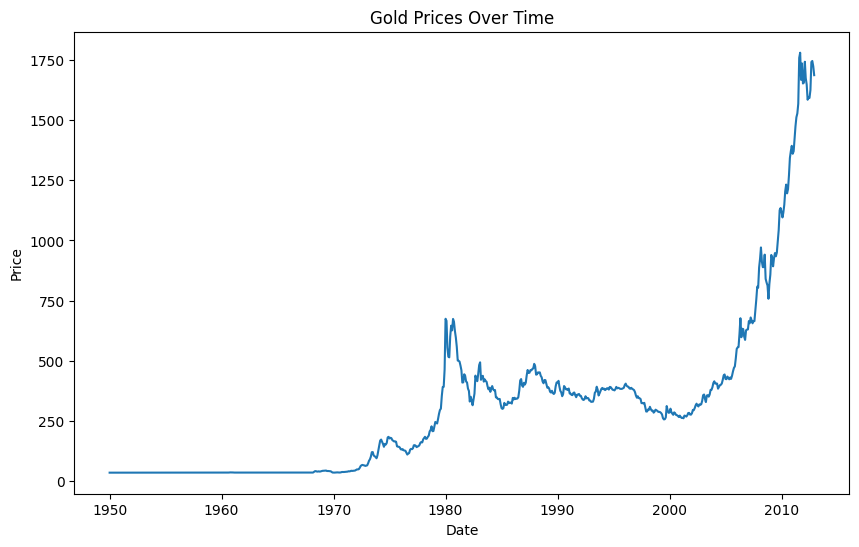

In [ ]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Gold Price')  # Replace Price with the actual column name
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


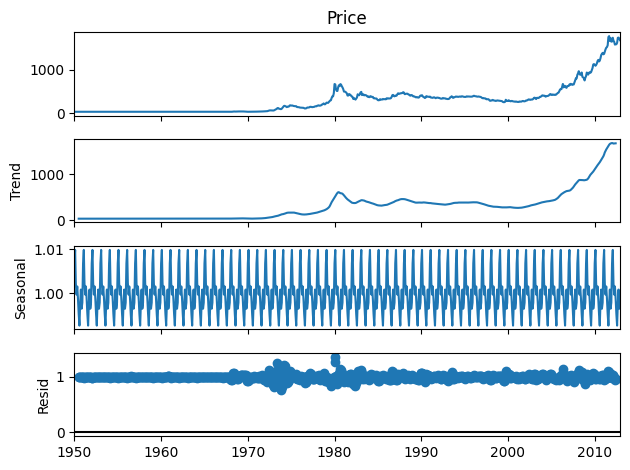

In [ ]:
# Decompose the time series to check for trend and seasonality

decomposition = seasonal_decompose(data['Price'], model='multiplicative', period=12)  # Adjust Price as need
decomposition.plot()
plt.show()


In [ ]:
# Perform Augmented Dickey-Fuller test for stationarity


result = adfuller(data['Price'])  # Adjust Price as need
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 2.4022677351864745
p-value: 0.9990113728329505


In [ ]:
# If the p-value > 0.05, apply differencing
if result[1] > 0.05:
    data['Price_diff'] = data['Price'] - data['Price'].shift(1)  # Adjust Price as need

In [ ]:
# ARIMA MODEL USED FOR TIME SERIES
# Fit ARIMA model (order=(p, d, q) where p=AR, d=differencing, q=MA)

model = ARIMA(data['Price'], order=(1, 1, 1))  # Adjust 'Price' as needed
model_fit = model.fit()

c:\Users\Vaishnavi\OneDrive\Documents\OneDrive\Desktop\Sales Forecasting with Time Series Analysis\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Vaishnavi\OneDrive\Documents\OneDrive\Desktop\Sales Forecasting with Time Series Analysis\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Vaishnavi\OneDrive\Documents\OneDrive\Desktop\Sales Forecasting with Time Series Analysis\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Print the model summary

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  756
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3378.249
Date:                Fri, 09 May 2025   AIC                           6762.498
Time:                        17:19:58   BIC                           6776.378
Sample:                    01-01-1950   HQIC                          6767.845
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5881      0.036    -16.311      0.000      -0.659      -0.517
ma.L1          0.7951      0.027     29.870      0.000       0.743       0.847
sigma2       450.7277      7.154     63.000      0.0

In [ ]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
print('Forecasted Gold Prices:', forecast)

Forecasted Gold Prices: 2013-01-01    1678.545538
2013-02-01    1683.718416
2013-03-01    1680.676435
2013-04-01    1682.465313
2013-05-01    1681.413339
2013-06-01    1682.031967
2013-07-01    1681.668175
2013-08-01    1681.882108
2013-09-01    1681.756301
2013-10-01    1681.830283
2013-11-01    1681.786777
2013-12-01    1681.812362
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_20808\2279059782.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]


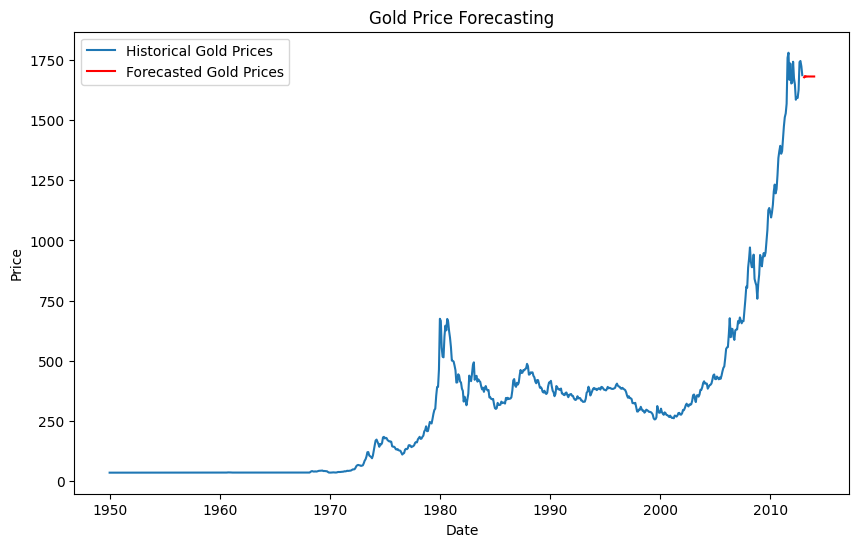

In [ ]:
# Plot the historical and forecasted sales

forecast_dates = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Historical Gold Prices')  # Adjust Price as need
plt.plot(forecast_dates, forecast, label='Forecasted Gold Prices', color='red')
plt.title('Gold Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Evaluate the model (MBE)
# Assuming you have actual data for the last 12 months for validation
# Replace this with actual data if available for validation

forecast_actual = data['Price'].tail(12)
mae = mean_absolute_error(forecast_actual, forecast)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 51.828144536819444


In [ ]:
from pandas.tseries.offsets import MonthEnd

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Create future dates (start from the next month after the last date in dataset)
forecast_dates = pd.date_range(start=data.index[-1] + MonthEnd(1), periods=12, freq='M')

# Convert forecast to a flat array if needed
forecast = forecast.values if hasattr(forecast, 'values') else forecast


C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_20808\1686667820.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + MonthEnd(1), periods=12, freq='M')


In [ ]:
# Create a DataFrame with forecasted dates and values
output_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Gold Price': forecast
})

# Save to CSV
output_df.to_csv("future_gold_price_forecast.csv", index=False)
print("Future gold price forecast saved to 'future_gold_price_forecast.csv'")


Future gold price forecast saved to 'future_gold_price_forecast.csv'


In [ ]:
#forecast = model_fit.forecast(steps=12)
#forecast_dates = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')

#Pandas: for reading CSV files, working with dataframes
#used ARIMA model for forecasting
#Statsmodels: for time series forecasting using ARIMA
#Scikit-learn (optional): for evaluation using mean_absolute_error
# Used dataset Gold_prices.csv
# used Augmented Dickey-Fuller test for stationarity
# what is stationarity and non-stationarity

